# Corpus_exploration

In [1]:
import pandas as pd
import os

In [2]:
df = pd.read_csv("metadata.csv", sep = ";")
df_authors = pd.read_csv("src/author_table.tsv", sep = "\t")

In [3]:
len(df["author"].unique())

372

In [30]:
gender = []

for author in list(df["author"]):
    gender.append(df_authors.loc[df_authors["Voller_Name"]==author, "Geschlecht"].values[0])
    
nationality= []

for author in list(df["author"]):
    nationality.append(df_authors.loc[df_authors["Voller_Name"]==author, "Nationalität"].values[0])
    
periods=[]

for author in list(df["author"]):
    birthyear = df_authors["Geburtsjahr"].loc[df_authors["Voller_Name"]==author]
    
    if int(birthyear.iloc[0])<1811:
        periods.append("Kunstepoche")
    elif (int(birthyear.iloc[0]) >= 1811) & (int(birthyear.iloc[0]) <=1828):
        periods.append("Vormärz")
    elif (int(birthyear.iloc[0]) > 1829) & (int(birthyear.iloc[0]) <=1870):
        periods.append("Realismus")
    else:
        periods.append("Moderne")

In [23]:
df["gender"]=gender
df["nationality"] = nationality

In [31]:
df["periods"]=periods

In [27]:
len(periods)

1764

In [25]:
len(df)

1764

In [28]:
df.head()

,Unnamed: 0,title,author,filename,pubyear,genre,sources,gender,nationality,token count,periods
0,40,Geschichte des Agathon,Christoph Martin Wieland,wieland_agathon01_1766.txt,1767.0,Prosa,https://www.deutschestextarchiv.de/book/show/w...,m,DEU,86212,Kunstepoche
1,41,Geschichte des Agathon,Christoph Martin Wieland,wieland_agathon02_1767.txt,1767.0,Prosa,https://www.deutschestextarchiv.de/book/show/w...,m,DEU,78034,Kunstepoche
2,38,Geschichte des Fräuleins von Sternheim,Christoph Martin Wieland,laroche_geschichte01_1771.txt,1771.0,Roman,https://www.deutschestextarchiv.de/book/show/l...,m,DEU,56559,Kunstepoche
3,39,Geschichte des Fräuleins von Sternheim,Christoph Martin Wieland,laroche_geschichte02_1771.txt,1771.0,Roman,https://www.deutschestextarchiv.de/book/show/l...,m,DEU,44061,Kunstepoche
4,237,Geschichte des Fräuleins von Sternheim,Sophie von La Roche,laroche_geschichte01_1771.txt,1771.0,Roman,https://www.deutschestextarchiv.de/book/show/l...,f,DEU,56559,Kunstepoche


In [8]:
import plotly.express as px 

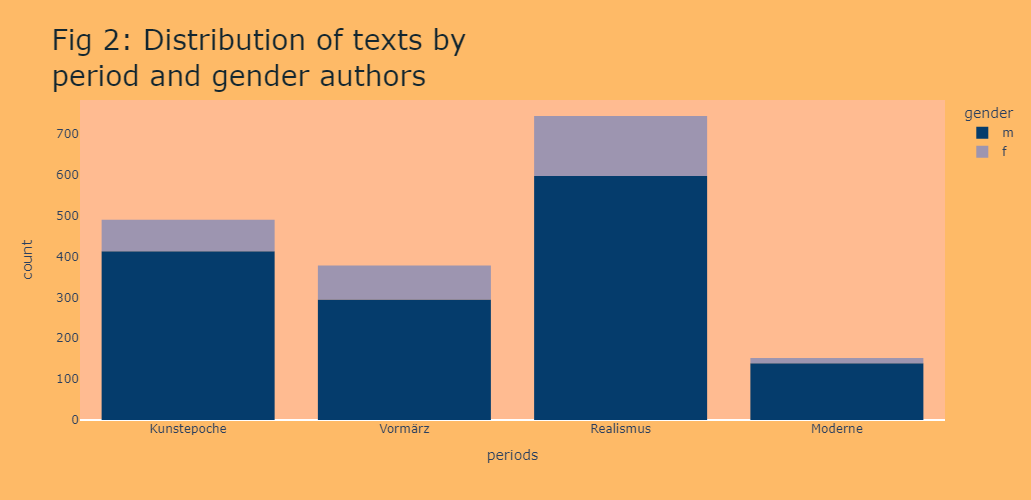

In [37]:
fig = px.histogram(df,
                   x="periods",
                   color="gender",
                   color_discrete_sequence=['#053c6c', '#9d95b0'],
                   title="Fig 2: Distribution of texts by<br>period and gender authors")
fig.update_layout({"plot_bgcolor":"#ffbb91", "paper_bgcolor":"#feba67", "width":500, "height":500},
                  xaxis=dict(showgrid=False),
                  yaxis=dict(showgrid=False),
                  title_font_color="#122630",
                  title=dict(font=dict(size=28), yref='paper')
                  )
fig.show()

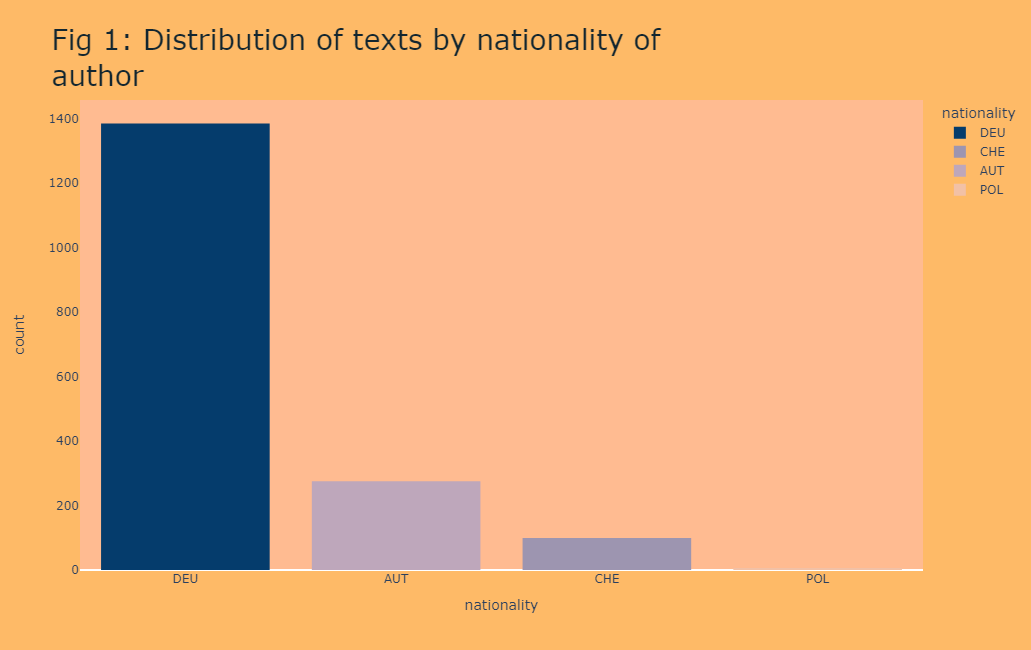

In [10]:
fig = px.histogram(df,
                   x="nationality",
                   color="nationality",
                   color_discrete_sequence=['#053c6c','#9d95b0','#bea7bb', '#f2c1a6'],
                   title="Fig 1: Distribution of texts by nationality of<br>author")
fig.update_xaxes(categoryorder="total descending")
fig.update_layout({"plot_bgcolor":"#ffbb91", "paper_bgcolor":"#feba67", "width":750, "height":650},
                  xaxis=dict(showgrid=False),
                  yaxis=dict(showgrid=False),
                  title_font_color="#122630",
                  title=dict(font=dict(size=28), yref='paper')
                  )
fig.show()

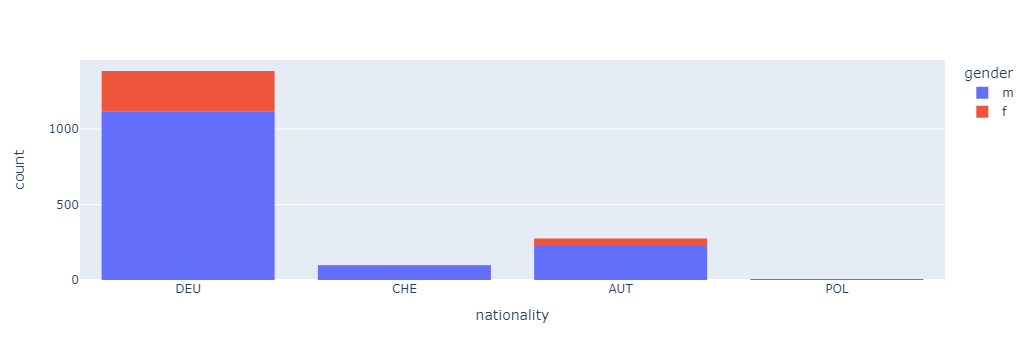

In [11]:
fig = px.histogram(df, x="nationality", color="gender")
fig.show()

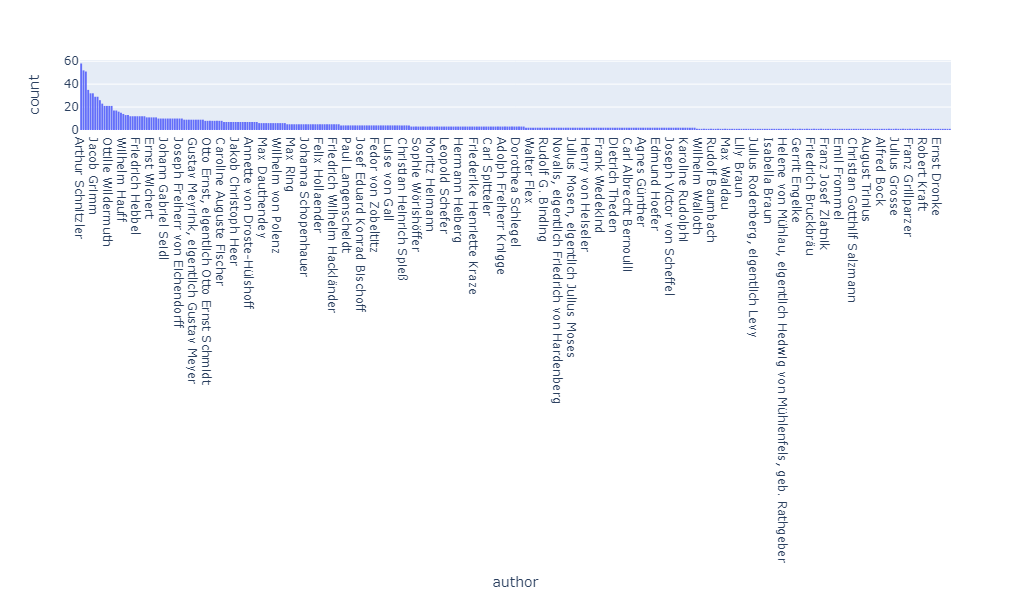

In [12]:
fig = px.histogram(df, x="author")
fig.update_xaxes(categoryorder="total descending")
fig.update_layout(height=600)
fig.show()

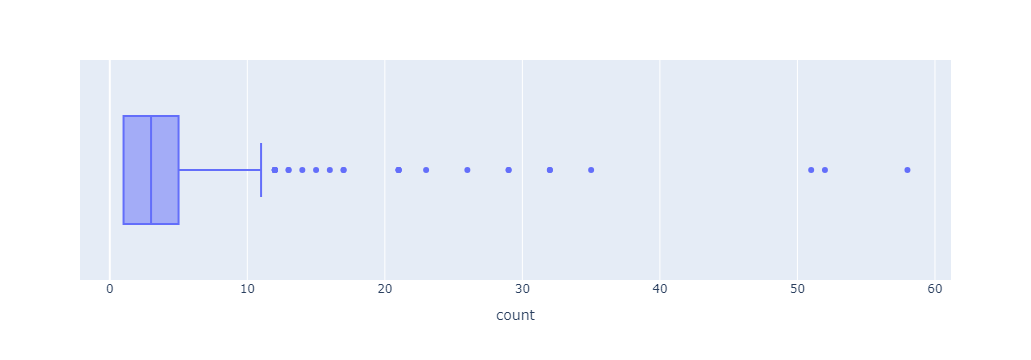

In [13]:
px.box(df["author"].value_counts(), x="count")

In [14]:
text_lengths = []

for text in list(df["filename"]):
    with open("src/corpus/" + text, "r", encoding="utf8") as f:
        text_lengths.append(len(f.read().split()))

In [20]:
df["token count"]=text_lengths

In [21]:
df.head()

,Unnamed: 0,title,author,filename,pubyear,genre,sources,gender,nationality,token count
0,40,Geschichte des Agathon,Christoph Martin Wieland,wieland_agathon01_1766.txt,1767.0,Prosa,https://www.deutschestextarchiv.de/book/show/w...,m,DEU,86212
1,41,Geschichte des Agathon,Christoph Martin Wieland,wieland_agathon02_1767.txt,1767.0,Prosa,https://www.deutschestextarchiv.de/book/show/w...,m,DEU,78034
2,38,Geschichte des Fräuleins von Sternheim,Christoph Martin Wieland,laroche_geschichte01_1771.txt,1771.0,Roman,https://www.deutschestextarchiv.de/book/show/l...,m,DEU,56559
3,39,Geschichte des Fräuleins von Sternheim,Christoph Martin Wieland,laroche_geschichte02_1771.txt,1771.0,Roman,https://www.deutschestextarchiv.de/book/show/l...,m,DEU,44061
4,237,Geschichte des Fräuleins von Sternheim,Sophie von La Roche,laroche_geschichte01_1771.txt,1771.0,Roman,https://www.deutschestextarchiv.de/book/show/l...,f,DEU,56559


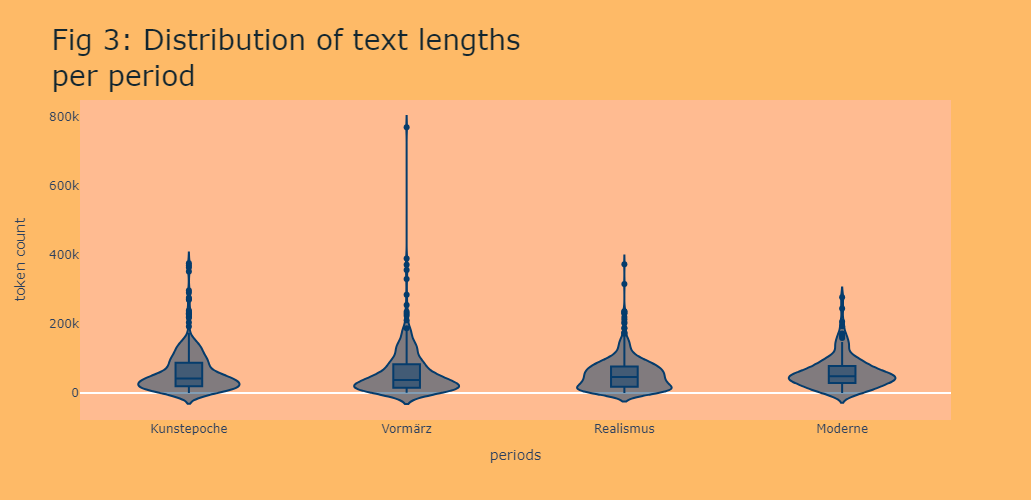

In [33]:
fig = px.violin(df,
       y="token count",
                x="periods",
       hover_data=["title", "author"],
       title="Fig 3: Distribution of text lengths<br>per period",
       color_discrete_sequence=["#053c6c"],
       box=True,
    )
fig.update_layout({"plot_bgcolor":"#ffbb91", "paper_bgcolor":"#feba67", "width":500, "height":500},
                  xaxis=dict(showgrid=False),
                  yaxis=dict(showgrid=False),
                  title_font_color="#122630",
                  title=dict(font=dict(size=28), yref='paper')
                  )
fig.show()

In [17]:
i=0
for text_length in list(df["text_lengths"]):
    i=i+text_length
    
i

KeyError: 'text_lengths'

In [ ]:
authors = []
all_text_length = []

for author in list(df["author"].unique()):
    inter_df = df[df["author"]==author]
    
    i=0
    for text_length in list(inter_df["text_lengths"]):
        i=i+text_length

    authors.append(author)
    all_text_length.append(i)
    
author_worklength_df = pd.DataFrame()
author_worklength_df["author"]=authors
author_worklength_df["all_text_length"]=all_text_length

In [ ]:
fig=px.bar(author_worklength_df, x="author", y="all_text_length")
fig.update_xaxes(categoryorder="total descending")
fig.update_layout(height=600)
fig.show()

In [ ]:
fig=px.box(author_worklength_df,x="all_text_length", hover_data=["author"], title="NOT FINAL, JUST FOR DEMONSTRATION PURPOSES: distribution of number of tokens per author")
#fig.update_xaxes(categoryorder="total descending")
fig.update_layout(height=600)
fig.show()

In [ ]:
df[df["author"]=="Johann Gottfried Herder"]

In [ ]:
gender = []

for author in list(author_worklength_df["author"]):
    gender.append(df_authors.loc[df_authors["Voller_Name"]==author, "Geschlecht"].values[0])
    
author_worklength_df["gender"]= gender

In [ ]:
len(author_worklength_df)

In [ ]:
fig = px.histogram(author_worklength_df, x="gender")
fig.show()